In [110]:
from datetime import datetime, timedelta

import xarray as xr


import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.io import metar
from metpy.plots.declarative import (BarbPlot, ContourPlot, FilledContourPlot, MapPanel,
                                     PanelContainer, PlotObs)
from metpy.units import units

In [111]:
# Open the netCDF file as a xarray Dataset and parse the full dataset
data = xr.open_dataset(get_test_data('GFS_test.nc', False)).metpy.parse_cf()

# View a summary of the Dataset
print(data)

<xarray.Dataset>
Dimensions:                                  (time: 1, isobaric3: 26, lat: 46,
                                              lon: 101,
                                              height_above_ground1: 1,
                                              isobaric5: 25,
                                              height_above_ground: 1)
Coordinates:
  * time                                     (time) datetime64[ns] 2010-10-26...
  * isobaric3                                (isobaric3) float32 1e+03 ... 1e+05
  * lat                                      (lat) float32 65.0 64.0 ... 20.0
  * lon                                      (lon) float32 210.0 211.0 ... 310.0
    metpy_crs                                object Projection: latitude_long...
  * height_above_ground1                     (height_above_ground1) float32 10.0
  * isobaric5                                (isobaric5) float32 1e+03 ... 1e+05
  * height_above_ground                      (height_above_ground) fl

In [112]:
plot_time = datetime(2023, 1, 25, 12)


In [113]:
ds = data.metpy.sel(lat=slice(70, 10), lon=slice(360 - 150, 360 - 55))

In [114]:
ds['wind_speed'] = mpcalc.wind_speed(ds['u-component_of_wind_isobaric'],
                                     ds['v-component_of_wind_isobaric'])

In [115]:
# Set attributes for contours of Geopotential Heights at 300 hPa
cntr2 = ContourPlot()
cntr2.data = ds
cntr2.field = 'Geopotential_height_isobaric'
cntr2.level = 300 * units.hPa
cntr2.time = plot_time
cntr2.contours = list(range(0, 10000, 120))
cntr2.linecolor = 'green'
cntr2.linestyle = 'solid'
cntr2.clabels = True

In [116]:
# Set attributes for plotting color-filled contours of wind speed at 300 hPa
#Greens,cool,YlOrRd,BrBG
cfill = FilledContourPlot()
cfill.data = ds
cfill.field = 'wind_speed'
cfill.level = 300 * units.hPa
cfill.time = plot_time
cfill.contours = list(range(10, 201, 20))
cfill.colormap = 'BuPu'
cfill.colorbar = 'horizontal'
cfill.plot_units = 'knot'

In [117]:
# Set the attributes for the map and add our data to the map
panel = MapPanel()
panel.area = [-125, -74, 20, 55]
panel.projection = 'lcc'
panel.layers = ['states', 'coastline', 'borders']
panel.title = f'{cfill.level.m}-hPa Heights and Wind Speed at {plot_time}'
panel.plots = [cfill, cntr2]

In [118]:
# Set the attributes for the panel and put the panel in the figure
pc = PanelContainer()
pc.size = (15, 15)
pc.panels = [panel]


In [119]:
# Set the attributes for the panel and put the panel in the figure
pc = PanelContainer()
pc.size = (15, 15)
pc.panels = [panel]


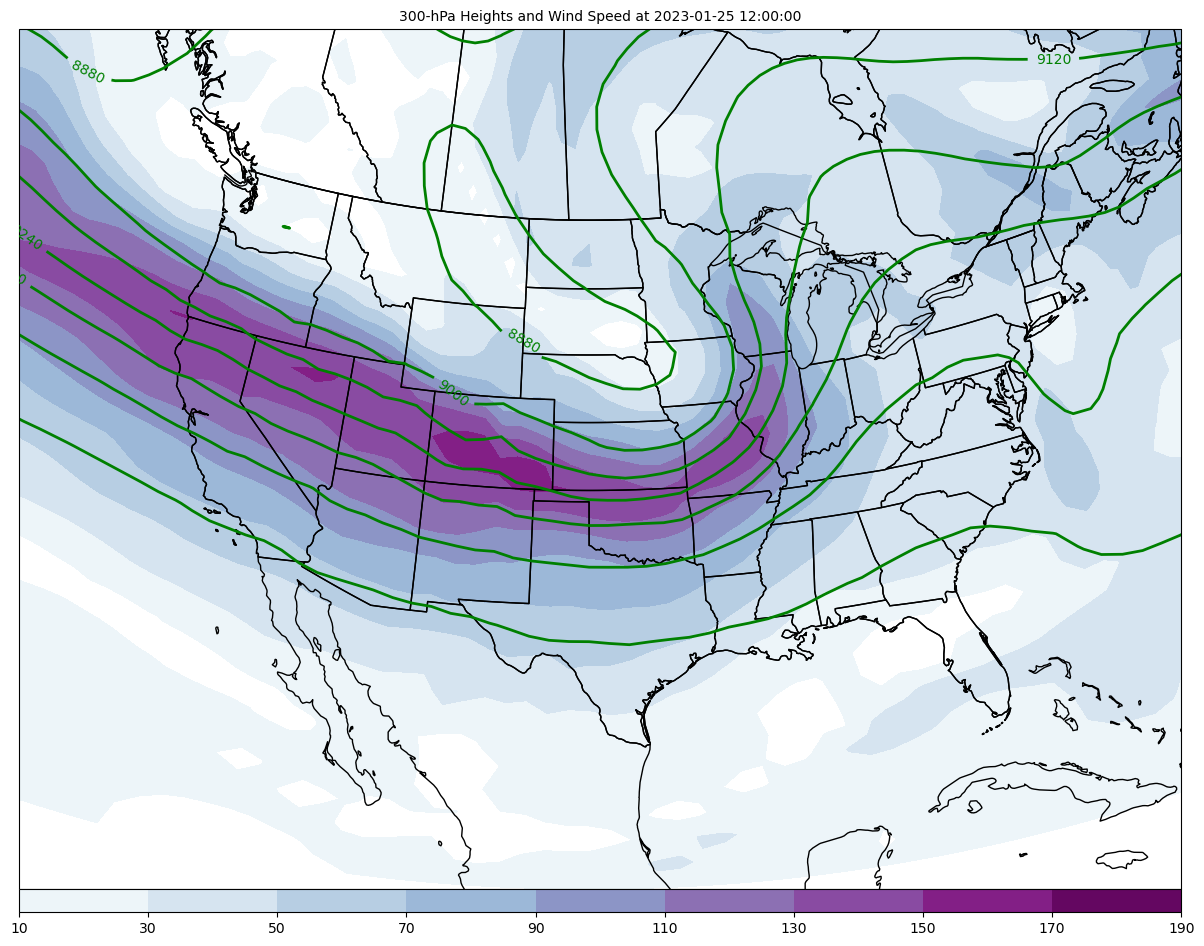

<Figure size 1500x1500 with 0 Axes>

In [120]:
# Show the image
pc.show()

In [127]:
plt.rcParams['animation.html']='jshtml'
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation 


In [136]:
from matplotlib.animation import FuncAnimation
artist= 0
anim = FuncAnimation(fig, ArtistAnimation,artist, interval=100)
anim

/Users/jorgemelchor/miniconda3/envs/unidata/lib/python3.11/site-packages/matplotlib/animation.py:1714: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


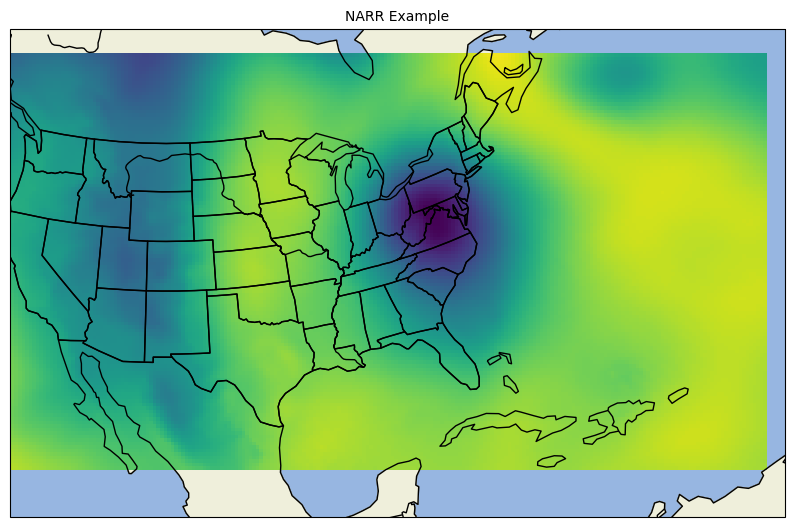

In [107]:
import xarray as xr
from metpy.cbook import get_test_data
from metpy.plots import ImagePlot, MapPanel, PanelContainer
from metpy.units import units

# Use sample NARR data for plotting
narr = xr.open_dataset(get_test_data('narr_example.nc', as_file_obj=False))

img = ImagePlot()
img.data = narr
img.field = 'Geopotential_height'
img.level = 850 * units.hPa

panel = MapPanel()
panel.area = 'us'
panel.layers = ['coastline', 'borders', 'states', 'rivers', 'ocean', 'land']
panel.title = 'NARR Example'
panel.plots = [img]

pc = PanelContainer()
pc.size = (10, 8)
pc.panels = [panel]
pc.show()


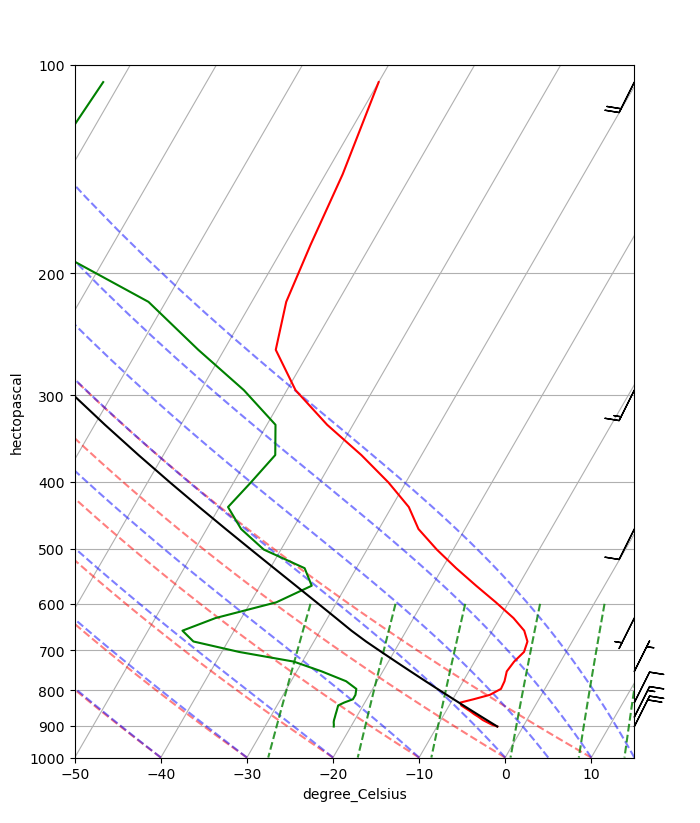

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import metpy.calc as mpcalc
from metpy.plots import SkewT
from metpy.units import units

fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig)

# Create arrays of pressure, temperature, dewpoint, and wind components
p = [902, 897, 893, 889, 883, 874, 866, 857, 849, 841, 833, 824, 812, 796, 776, 751,
     727, 704, 680, 656, 629, 597, 565, 533, 501, 468, 435, 401, 366, 331, 295, 258,
     220, 182, 144, 106] * units.hPa
t = [-3, -3.7, -4.1, -4.5, -5.1, -5.8, -6.5, -7.2, -7.9, -8.6, -8.9, -7.6, -6, -5.1,
     -5.2, -5.6, -5.4, -4.9, -5.2, -6.3, -8.4, -11.5, -14.9, -18.4, -21.9, -25.4,
     -28, -32, -37, -43, -49, -54, -56, -57, -58, -60] * units.degC
td = [-22, -22.1, -22.2, -22.3, -22.4, -22.5, -22.6, -22.7, -22.8, -22.9, -22.4,
      -21.6, -21.6, -21.9, -23.6, -27.1, -31, -38, -44, -46, -43, -37, -34, -36,
      -42, -46, -49, -48, -47, -49, -55, -63, -72, -88, -93, -92] * units.degC
# Calculate parcel profile
prof = mpcalc.parcel_profile(p, t[0], td[0]).to('degC')
u = np.linspace(-10, 10, len(p)) * units.knots
v = np.linspace(-20, 20, len(p)) * units.knots

skew.plot(p, t, 'r')
skew.plot(p, td, 'g')
skew.plot(p, prof, 'k')  # Plot parcel profile
skew.plot_barbs(p[::5], u[::5], v[::5])

skew.ax.set_xlim(-50, 15)
skew.ax.set_ylim(1000, 100)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

plt.show()

In [1]:
pwd


'/Users/jorgemelchor/miniconda3/envs/unidata'